In [1]:
from functions_load import load_and_process

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



In [3]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [4]:
df=load_and_process('C:\\Users\\mehdi\\data301\\course-project-solo_506-1\\data\\raw\\Data.csv')

C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [13]:
df

,cps19_religion,cps19_province,cps19_yob,cps19_employment,cps19_gender,cps19_education,cps19_imm,cps19_bornin_canada,cps19_econ_retro,cps19_own_fin_retro,pes19_votechoice2019,pes19_nativism1,pes19_nativism5,pes19_immigjobs,age,attitude,cpes19_immigjobs,cpes19_nativism1,cpes19_nativism5,ccps19_own_fin_retro
82,Orthodox,Ontario,72,Working for pay full-time,Female,Master degree,About the same number of immigrants as now,Canadian,Stayed about the same,2,Liberal,Somewhat disagree,Strongly disagree,Somewhat disagree,28,2.0,2.0,2.0,1.0,2
83,Atheist,British Columbia,41,Retired,Male,Bachelor degree,Fewer immigrants,Canadian,Got worse,2,Conservative,Somewhat agree,Strongly disagree,Strongly disagree,59,1.0,1.0,4.0,1.0,2
88,Atheist,Alberta,35,Retired,Male,Bachelor degree,More immigrants,Canadian,Got worse,2,Conservative,Neither agree nor disagree,Strongly disagree,Strongly disagree,65,3.0,1.0,3.0,1.0,2
114,Pentecostal/ Fundamentalist/ Born Again/ Evang...,Newfoundland,36,Working for pay part-time,Female,Completed technical,Fewer immigrants,Canadian,Got worse,2,Conservative,Strongly agree,Somewhat agree,Somewhat agree,64,1.0,4.0,5.0,4.0,2
143,United Church of Canada,Ontario,46,Working for pay full-time,Female,Bachelor degree,Fewer immigrants,Canadian,Got better,1,Liberal,Somewhat agree,Somewhat disagree,Somewhat disagree,54,1.0,2.0,4.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37803,Catholic,New Brunswick,78,Student,Female,Some university,More immigrants,Canadian,Stayed about the same,3,Green Party,Somewhat disagree,Somewhat disagree,Somewhat disagree,22,3.0,2.0,2.0,2.0,3
37808,Catholic,Newfoundland,50,Working for pay full-time,Male,Bachelor degree,Fewer immigrants,Canadian,Stayed about the same,2,Liberal,Strongly agree,Neither agree nor disagree,Somewhat agree,50,1.0,4.0,5.0,3.0,2
37810,Protestant,Ontario,25,Working for pay full-time,Male,Some technical,Fewer immigrants,Canadian,Stayed about the same,2,NDP,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,75,1.0,3.0,2.0,3.0,2
37815,Atheist,Quebec,38,Working for pay full-time,Male,Some university,About the same number of immigrants as now,Canadian,Got better,2,Bloc Québécois,Somewhat agree,Strongly disagree,Strongly disagree,62,2.0,1.0,4.0,1.0,2


In [11]:
df.dtypes

cps19_religion          category
cps19_province          category
cps19_yob                  int64
cps19_employment        category
cps19_gender            category
cps19_education         category
cps19_imm               category
cps19_bornin_canada     category
cps19_econ_retro        category
cps19_own_fin_retro     category
pes19_votechoice2019    category
pes19_nativism1         category
pes19_nativism5         category
pes19_immigjobs         category
age                        int64
attitude                 float64
cpes19_immigjobs         float64
cpes19_nativism1         float64
cpes19_nativism5         float64
dtype: object

In [5]:
df.loc[df['cps19_imm']=="Fewer immigrants",'attitude']=1
df.loc[df['cps19_imm']=="About the same number of immigrants as now",'attitude']=2
df.loc[df['cps19_imm']=="More immigrants",'attitude']=3

df.loc[df['pes19_immigjobs']=="Strongly disagree",'cpes19_immigjobs']=1
df.loc[df['pes19_immigjobs']=="Somewhat disagree",'cpes19_immigjobs']=2
df.loc[df['pes19_immigjobs']=="Neither agree nor disagree",'cpes19_immigjobs']=3
df.loc[df['pes19_immigjobs']=="Somewhat agree",'cpes19_immigjobs']=4
df.loc[df['pes19_immigjobs']=="Strongly agree",'cpes19_immigjobs']=5



df.loc[df['pes19_nativism1']=="Strongly disagree",'cpes19_nativism1']=1
df.loc[df['pes19_nativism1']=="Somewhat disagree",'cpes19_nativism1']=2
df.loc[df['pes19_nativism1']=="Neither agree nor disagree",'cpes19_nativism1']=3
df.loc[df['pes19_nativism1']=="Somewhat agree",'cpes19_nativism1']=4
df.loc[df['pes19_nativism1']=="Strongly agree",'cpes19_nativism1']=5

df.loc[df['pes19_nativism5']=="Strongly disagree",'cpes19_nativism5']=1
df.loc[df['pes19_nativism5']=="Somewhat disagree",'cpes19_nativism5']=2
df.loc[df['pes19_nativism5']=="Neither agree nor disagree",'cpes19_nativism5']=3
df.loc[df['pes19_nativism5']=="Somewhat agree",'cpes19_nativism5']=4
df.loc[df['pes19_nativism5']=="Strongly agree",'cpes19_nativism5']=5

df['ccps19_own_fin_retro']=df['cps19_own_fin_retro'].astype('int')

In [6]:
df.describe ()

,cps19_yob,age,attitude,cpes19_immigjobs,cpes19_nativism1,cpes19_nativism5,ccps19_own_fin_retro
count,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000
mean,45.267208,54.732792,1.802742,2.387801,3.895076,2.433128,2.147734
std,15.589811,15.589811,0.711336,1.282021,1.075079,1.262111,0.639671
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,42.000000,1.000000,1.000000,3.000000,1.000000,2.000000
50%,43.000000,57.000000,2.000000,2.000000,4.000000,2.000000,2.000000
75%,58.000000,67.000000,2.000000,3.000000,5.000000,3.000000,3.000000
max,82.000000,99.000000,3.000000,5.000000,5.000000,5.000000,4.000000


<b>Introduction</b>

The main goal of this  project is first to understand attitude of different groups of people toward immigration. In the survey that I am using, there is a question asking "Do you think Canada should admit", So this question shows attitude of respondents toward immigration. If they say the level of immigration should be icreased then they are pro immigration and if they say Canada should admit fewer immigrants then they are anti immigration. First in the following diagrams I want to explore the opinions of different socio-demographic variables about immigration. Therefore, I am going to use just socio histogram as I think it is the best way to explore it. 

<b>Analysis</b>

The first goal of this analysis is understand the attitude of different socio-demographic group toward immigration. I use  histograms because both independent and depenedent variables are categorical. After understanding the attitude of different groups. I will take a closer look to my analysis by using regression model. 

<b>Question 1</b>
What are the attitudes of different socio-demographic groups toward immigration 

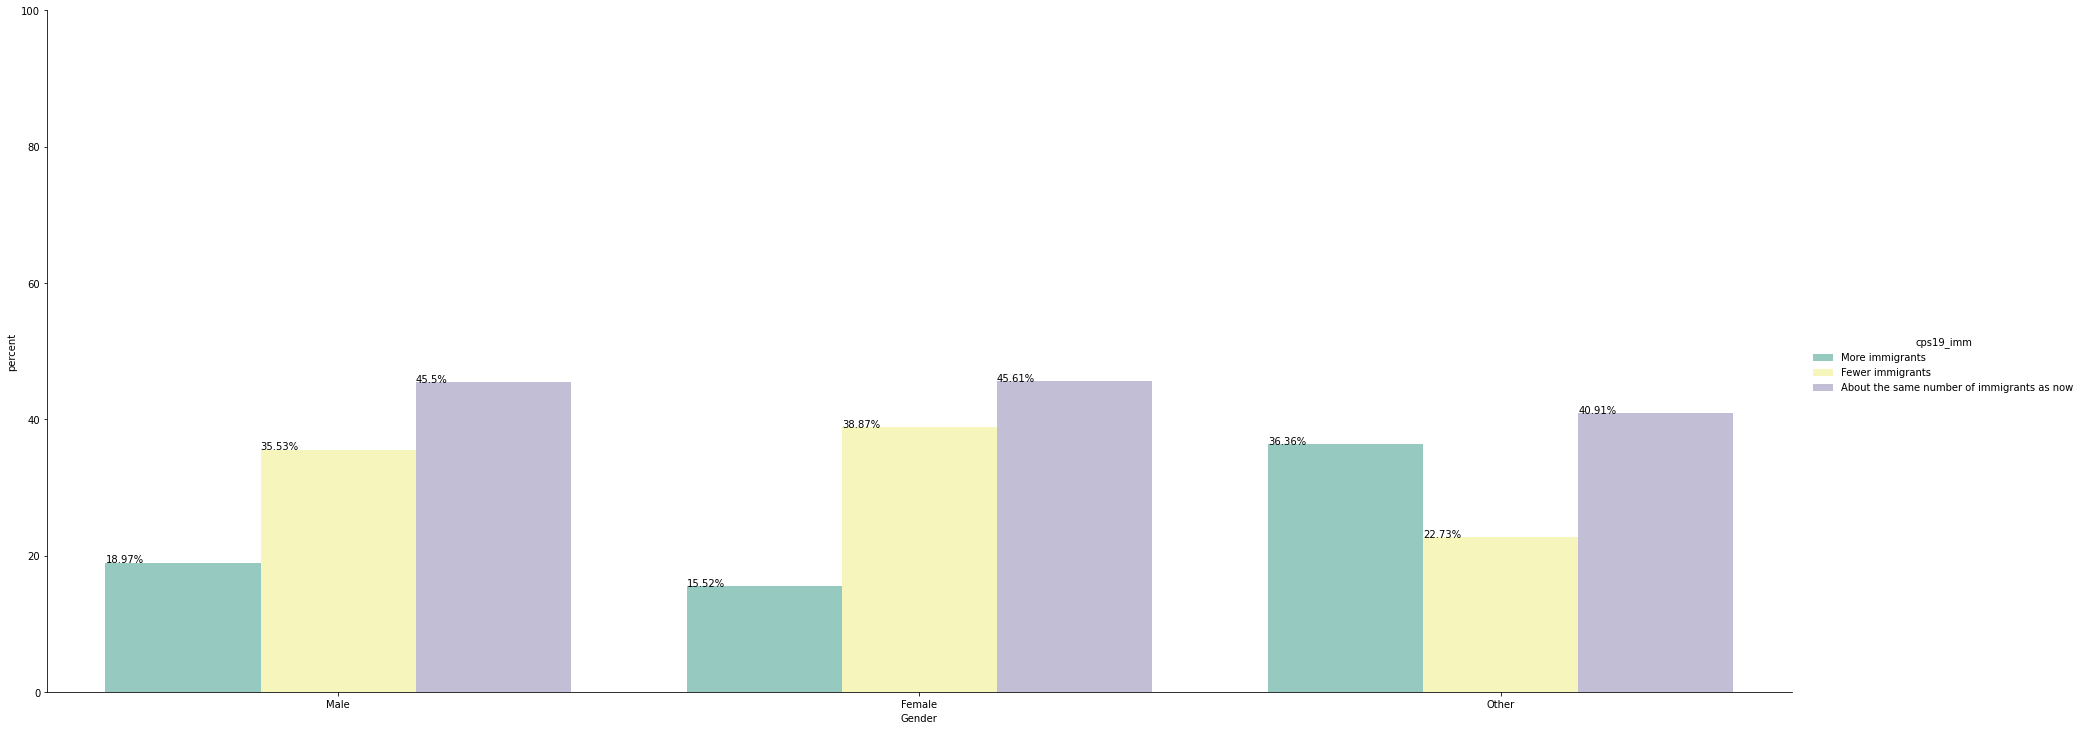

In [30]:
x,y = 'cps19_gender', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=10,aspect=2.5,palette="Set3")
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('Gender')
g.savefig('Gender.png')


The above graph shows that there is not much differences  between men and women's attitude toward immigration. The only difference is amon people said the level of immigration should be increased. around 19 percent  of men are pro-immigration while only %15.52 of women prefer the an increase in the level of immigration.    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


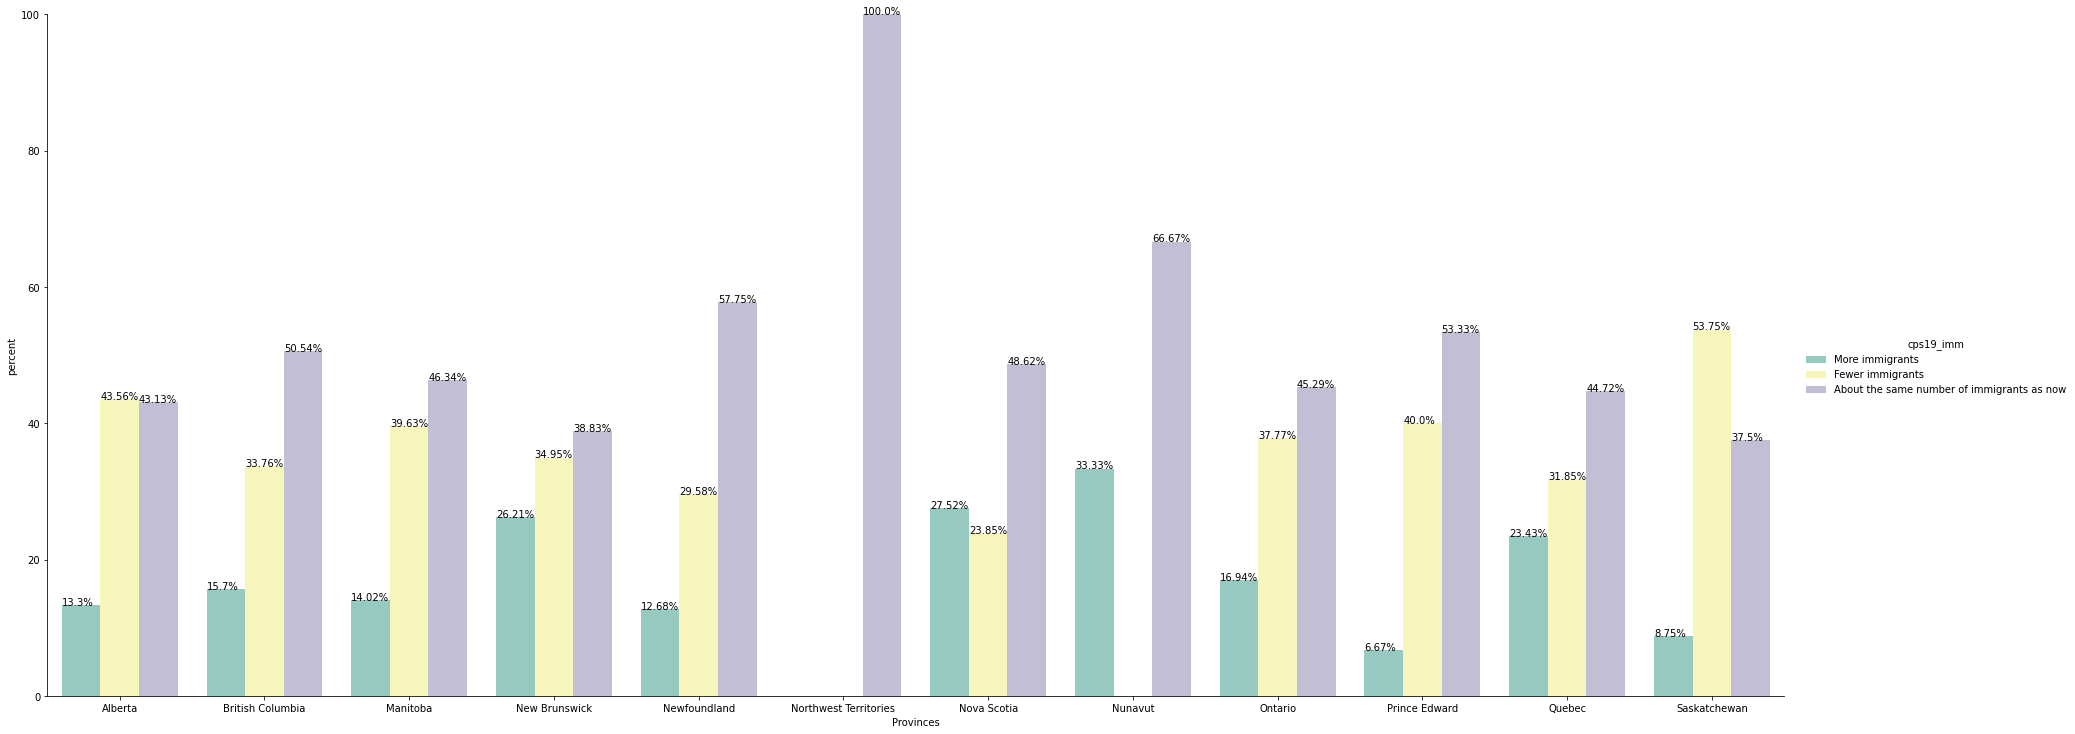

In [31]:
x,y = 'cps19_province', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=10,aspect=2.5,palette="Set3")
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('Provinces')
g.savefig('Provinces.png')


The above article shows the importance of provinces in attitude toward immigation.The graph shows that people living in Saskatchewan and Alberta have worst attitudes. surprisingly, %54 of people living in Saskatchewan said the government should decrease the level of immigration. The most welcome people are those libing in Newfoundland and Prince Edward. It is important to mention that the number of observation on two provinces of Northwest Territories and Nunavut are very low so it is hard to make a conclution regarding these two provinces. Also one might say that people living in Saskatchewan are against immigration not because of region but because the level of education in this province is lower that others. The only way to see the  pure effect of region is to use regression analysis. I will conduct it later.  

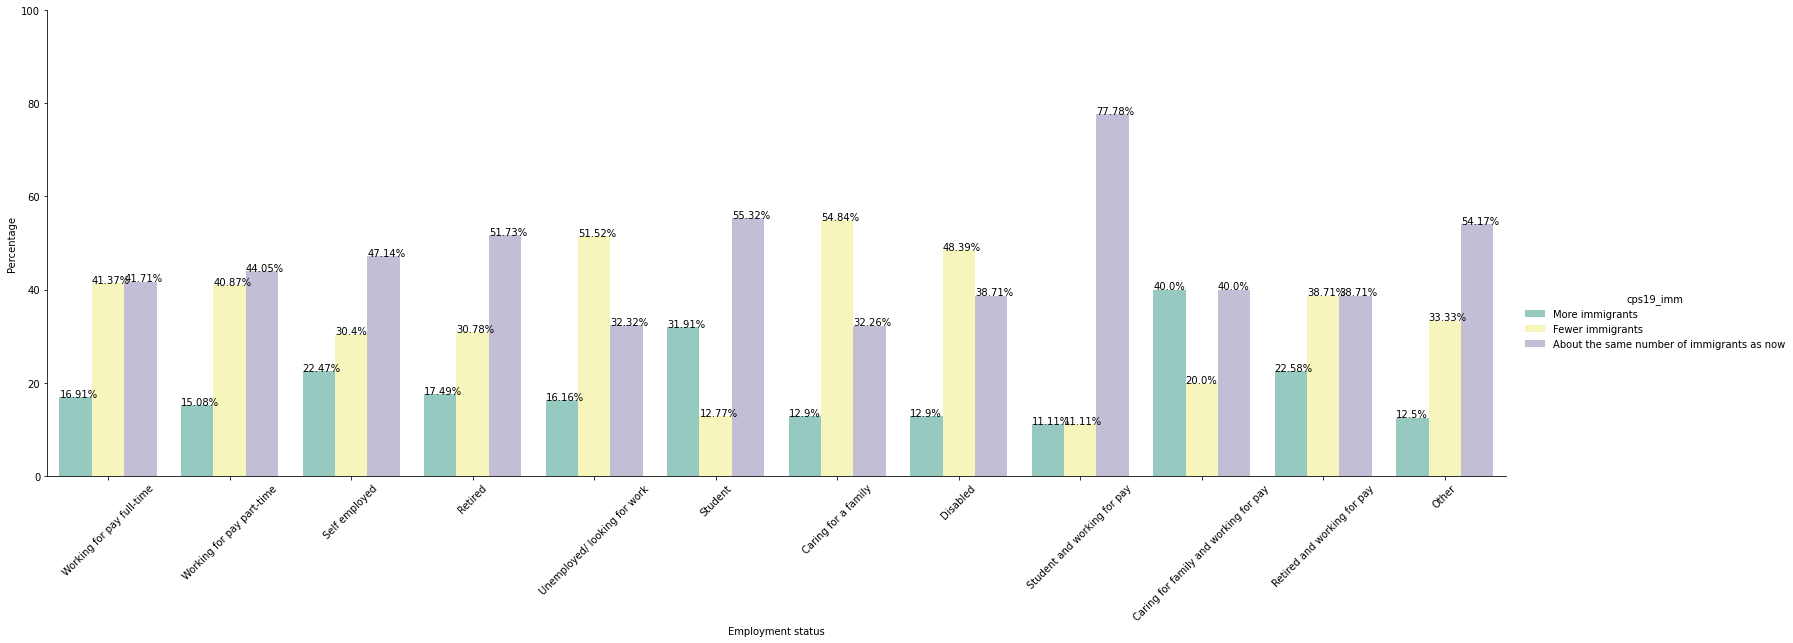

In [32]:
x,y = 'cps19_employment', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,height=7,aspect=3,palette="Set3")
g.ax.set_ylim(0,100)
plt.xlabel("Employment status")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.savefig('Employment status.png')

The above graph shows the attitude towards immigtation based on employment stauts. Not surprosingly, those who are unemployed or care for family (homemakers) are against immigration. One explanation for this observation is that those who  do not have work think immigrants steal their job (labour market theory). I will explore this idea in my regression analysis.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


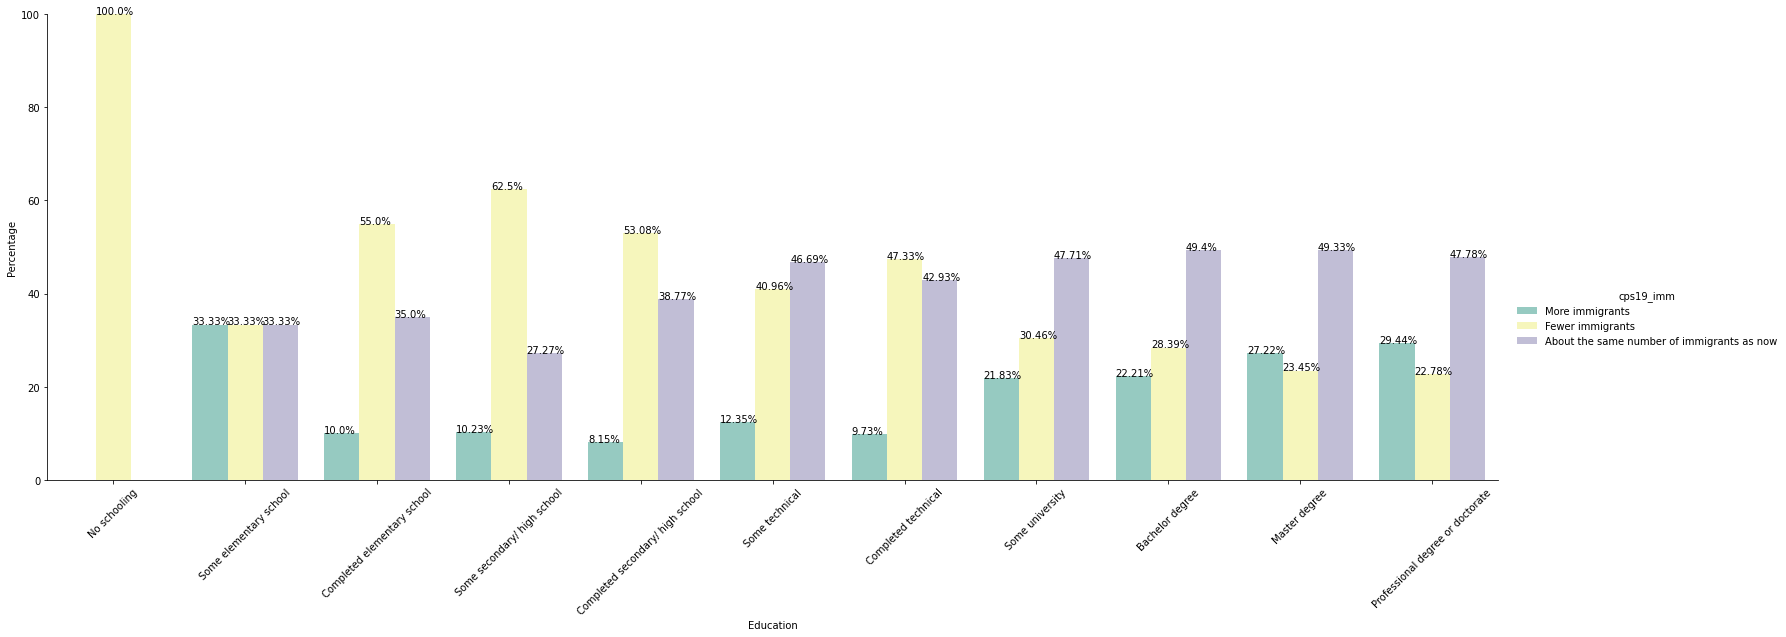

In [33]:
x,y = 'cps19_education', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,height=7,aspect=3,palette="Set3")
g.ax.set_ylim(0,100)
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.savefig('education.png')


The above graph suggests that as the level of education increases, people become more welcome toward immigrants. While %55 of people completed elementary school are against immigration only %22 of people with PhD are against immigration. It should be stress that the number of observation for the first two categories no schooling and some elementary schools are just 48 and 78 respectively. I think this is the reason of those outliers

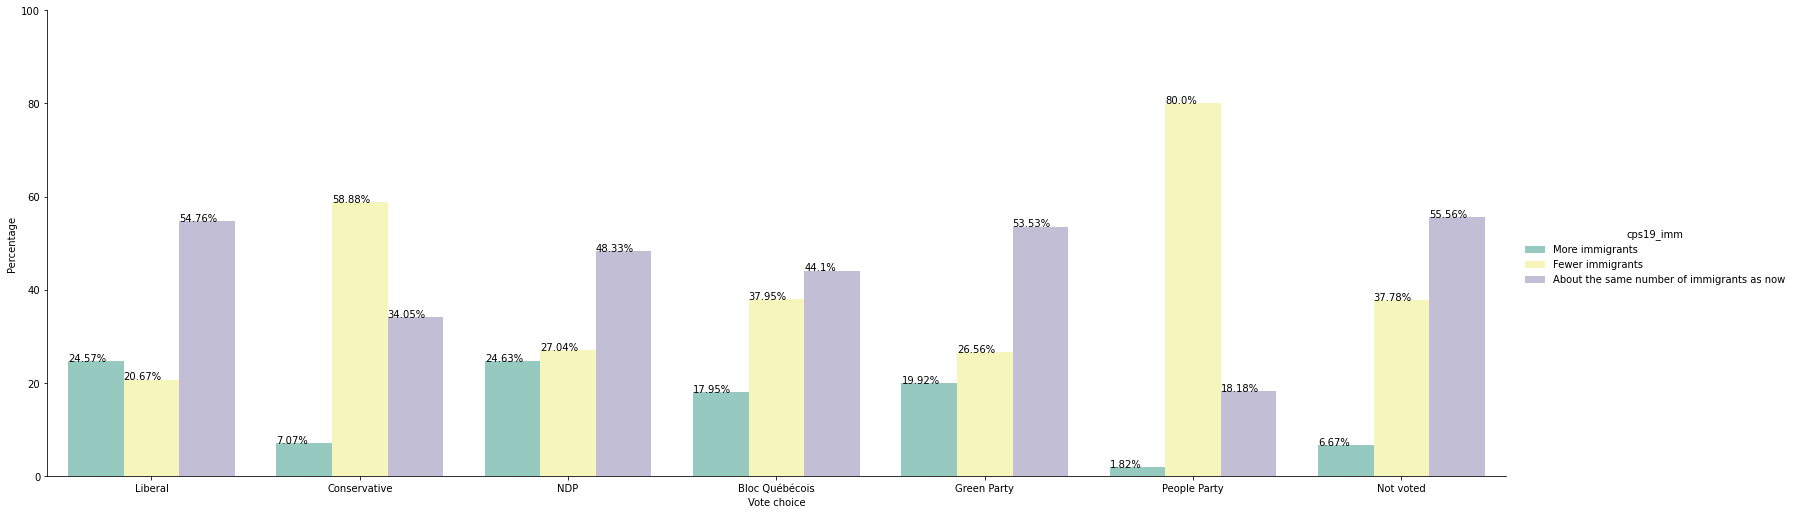

In [34]:
x,y = 'pes19_votechoice2019', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,height=7,aspect=3,palette="Set3")
g.ax.set_ylim(0,100)
plt.xlabel("Vote choice")
plt.ylabel("Percentage")
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.savefig('voting.png')

It will be interesting to see the effect politics on attitudes toward immigration. The above graph shows the relationship  between vote choice and attitude toward immigration.  As it is obvious, people who voted for the People party are highly against immigration. The People Party was formed in 2018 and 2019 was it first election. This party is a far-right party and highly support restrictive immigration policies. The second anti-immigrtion party is Conservative party. it is interesting that people vote for the Liberal Party are more proimmigration that NDP party, although NDP has more left posistion than Liberal party. Again it is important to analysis the above graph by regressions because one may say that the region is more important than vote choice because for example, people who voted for the Conservative party mostly live in the regions that are already against immigration (Alberta and Saskatchewan). 

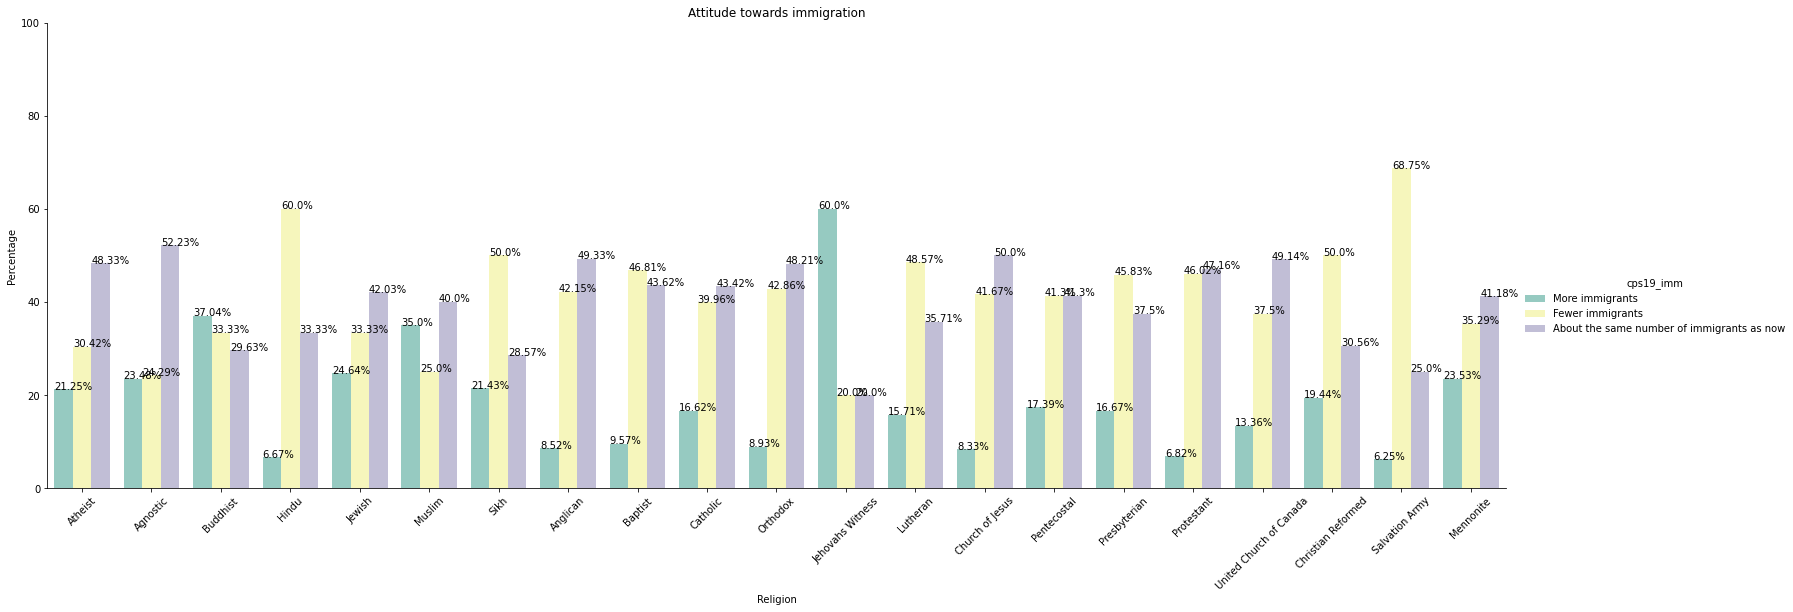

In [7]:
x,y = 'cps19_religion', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,height=7,aspect=3,palette="Set3")
g.ax.set_ylim(0,100)
plt.title('Attitude towards immigration')
plt.xlabel("Religion")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.savefig('Religion.png')

The above graph shows the relationship between religions and attitudes toward immigration.

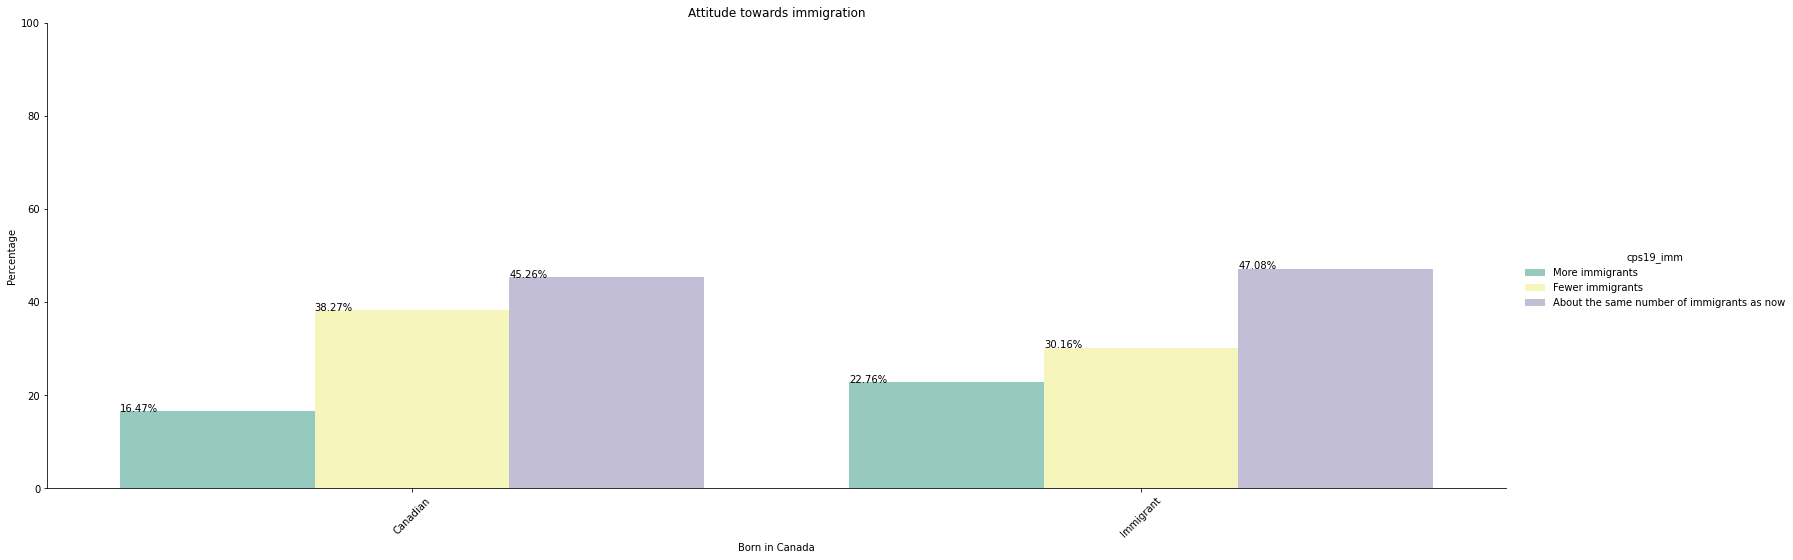

In [28]:
x,y = 'cps19_bornin_canada', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,height=7,aspect=3,palette="Set3")
g.ax.set_ylim(0,100)
plt.title('Attitude towards immigration')
plt.xlabel("Born in Canada")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.savefig('Native.png')


It is surprising that being born in Canada does not that much considerable effect on attitude toward immigration.

In [75]:
model = ols('attitude ~C(cps19_religion	) + C(cps19_employment)+ C(cps19_province)+C(cps19_employment)+C(cps19_gender)+C(cps19_education)+C(cps19_bornin_canada)+age', data=df)

In [76]:
fitted_model = model.fit()
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:               attitude   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     8.999
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.28e-67
Time:                        01:52:05   Log-Likelihood:                -3614.2
No. Observations:                3574   AIC:                             7342.
Df Residuals:                    3517   BIC:                             7695.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [19]:
reg_result = pd.concat((fitted_model.params, fitted_model.tvalues), axis=1)
reg_result.round(2)

,0,1
Intercept,1.54,9.27
C(cps19_religion)[T.Agnostic],0.07,1.42
C(cps19_religion)[T.Buddhist],0.07,0.51
C(cps19_religion)[T.Hindu],-0.56,-3.16
C(cps19_religion)[T.Jewish],-0.08,-0.90
C(cps19_religion)[T.Muslim],0.09,0.82
C(cps19_religion)[T.Sikh],-0.11,-0.60
C(cps19_religion)[T.Anglican],-0.24,-4.64
C(cps19_religion)[T.Baptist],-0.27,-3.70
C(cps19_religion)[T.Catholic],-0.17,-5.44


The above regression analyzes the effect of sociodemographic variables on attitude toward immigration Regarding the education variable, the omitted category is Atheist. The categories of Hindu, Anglican, Baptist, Catholics, Orthodox,  United church of Canada, and Salvation Army are significant. Interestingly, for all the categories the coefficients are negative meaning that they are more against immigration than Atheists. Therefore, the table suggests that among all the religions Atheists are more welcome toward immigration than any other groups. For the employment status variable, the reference category is people working full time. The coefficient for the Retired category is significant but positive. it means that retired people are more welcome than people working full-time. This finding is surprising because it is against the welfare economic model of attitude toward immigration. Based on the Welfare Theory, people are against immigration because they think immigrants' payments on taxes are lower than services received from the government. The omitted category for the province is Alberta. The coefficient for Saskatchewan is negative showing that even after controlling for all salience socio-demographic variables people living in Saskatchewan are more against any other provinces in Canada. . Regarding Gender, there is no difference between females and males' attitudes toward immigration. 

<ipython-input-28-cc5daad1704f>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df1.shape[0]),


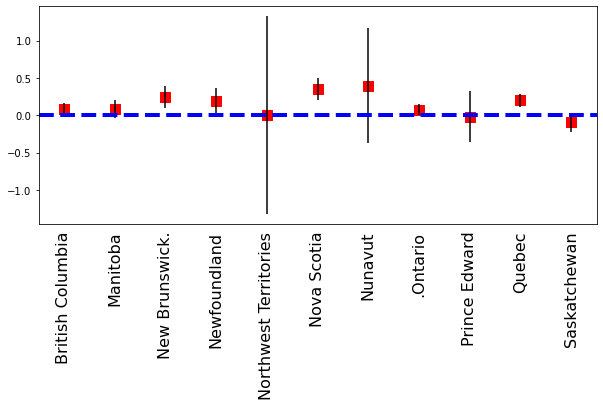

<Figure size 1440x216 with 0 Axes>

In [28]:
err_serries=fitted_model.params-fitted_model.conf_int()[0]
coef_df = pd.DataFrame({'coef': fitted_model.params.values[1:],
                        'err': err_serries.values[1:],
                        'varname': err_serries.index.values[1:]
                       })

coef_df1=coef_df.loc[coef_df['varname'].str.contains('cps19_province')]
fig, ax = plt.subplots(figsize=(8, 5))
plt.figure(figsize=(20, 3))
coef_df1.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False, figsize=(10, 4))
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df1.shape[0]), 
           marker='s', s=120, 
           y=coef_df1['coef'], color='r')
ax.axhline(y=0, linestyle='--', color='b', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['British Columbia', 'Manitoba', 'New Brunswick.', 'Newfoundland', 'Northwest Territories','Nova Scotia','Nunavut','.Ontario','Prince Edward','Quebec','Saskatchewan'], 
                       rotation=90, fontsize=16)
fig.savefig('Province_OLS.png')


The above diagram shows the attitude of provinces with 95 percent of the confidence interval.  . The omitted category  is Alberta. the provinces that their positions in the graph are lower than the blue line, they are more against immigration compared to Alberta. With this diagram, we can understand that Saskatchewan is the most anti-immigration province in Canada even after controlling for socio-demographic variables. The second province is Alberta. It is true that the category is omitted and we cannot see it in the graph but since all the provinces have better attitudes toward immigration compared to Alberta, this province is the second most anti-immigration province in Canada. Nova Scotia is the most welcoming province in Canada. The reason  Nunavut is not  the most welcoming province is that its confidence interval crosses the blue line. 

<b>Question 2</b>
What are the sources of attitude toward immigration in Canada?

To answer this question, I am going to add three variables to my regressions.  pes19_nativism1 ask respondents: if they agree with the following sentence:
Minorities should adapt to the customs and traditions of Canada. 

pes19_nativism5 asks respondents if they agree with the following sentence:
Immigrants increase crime rates in Canada.
pes19_immigjobs asks if they agree with the following questions
Immigrants take jobs away from other Canadians
these three questions frame three important theories of attitudes toward immigration. pes19_nativism1  is based on the Social-psychology theory. This theory suggests that Social-psychological theory points out that attitudes toward immigration are shaped by complicated processes during one's childhood or "an expression of stereotypical beliefs resulting from cognitive limitations and distortions in attributions"(Quillian 995, 587).
The pes19_nativism5  variable is according to the Group Theory. Based on this theory people explain that harms to one individual native could be supposed as detrimental to all people of that society (Sidanius and Pratto 1999). For example, even if immigrants are less likely to commit a crime, but the belief that immigrants are criminal leads to shaping the identity of native people in a country (Card, Dustmann, and Preston 2005). 

pes19_immigjobs  is based on Political Economy theory. It focuses on material self-interest in which public opinion is formed through two channels of labor market competition and taxes. According to this theory, people are against immigration because they have a sense of competition with them in the labor market. Unfortunately, the data does not allow me to test if the Canadian attitude toward immigration is because of  taxes. 

In [31]:
model2 = ols('attitude ~C(cps19_religion	) + C(cps19_employment)+ C(cps19_province)+C(cps19_employment)+C(cps19_gender)+C(cps19_education)+C(cps19_bornin_canada)+age+cpes19_nativism5+cpes19_nativism1+cpes19_immigjobs+ccps19_own_fin_retro', data=df)

In [32]:
fitted_model2 = model2.fit()
fitted_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attitude   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     43.65
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:22:52   Log-Likelihood:                -2858.0
No. Observations:                3574   AIC:                             5838.
Df Residuals:                    3513   BIC:                             6215.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        2.2424      0.550      4.076      0.000       1.164       3.321
C(cps19_religion)[T.Agnostic]                                   -0.0015      0.039     -0.040      0.968      -0.078       0.075
C(cps19_religion)[T.Buddhist]                                    0.1422      0.107      1.327      0.185      -0.068       0.352
C(cps19_religion)[T.Hindu]                                      -0.3052      0.144     -2.122      0.034      -0.587      -0.023
C(cps19_religion)[T.Jewish]                                     -0.0044      0.068     -0.064      0.949      -0.138       0.130
C(cps19_religion)[T.Muslim]                                      0.1182      0.089      1.324      0.185      -0.057       0.293
C(cps19_religion)[T.Sikh]                                       -0.0823      0.147     -0.560      0.576      -0.371       0.206
C(cps19_religion)[T.Anglican]                                   -0.1219      0.042     -2.923      0.003      -0.204      -0.040
C(cps19_religion)[T.Baptist]                                    -0.0892      0.060     -1.498      0.134      -0.206       0.028
C(cps19_religion)[T.Catholic]                                   -0.0180      0.025     -0.708      0.479      -0.068       0.032
C(cps19_religion)[T.Orthodox]                                   -0.1248      0.075     -1.656      0.098      -0.273       0.023
C(cps19_religion)[T.Jehovahs Witness]                            0.5493      0.245      2.240      0.025       0.069       1.030
C(cps19_religion)[T.Lutheran]                                   -0.0436      0.068     -0.638      0.524      -0.178       0.090
C(cps19_religion)[T.Church of Jesus]                            -0.0354      0.159     -0.223      0.824      -0.347       0.276
C(cps19_religion)[T.Pentecostal]                                 0.0374      0.060      0.621      0.534      -0.081       0.155
C(cps19_religion)[T.Presbyterian]                               -0.0731      0.068     -1.082      0.279      -0.206       0.059
C(cps19_religion)[T.Protestant]                                 -0.1513      0.045     -3.336      0.001      -0.240      -0.062
C(cps19_religion)[T.United Church of Canada]                    -0.0832      0.041     -2.015      0.044      -0.164      -0.002
C(cps19_religion)[T.Christian Reformed]                          0.0744      0.093      0.802      0.422      -0.107       0.256
C(cps19_religion)[T.Salvation Army]                             -0.1942      0.139     -1.393      0.164      -0.468       0.079
C(cps19_religion)[T.Mennonite]                                   0.1104      0.134      0.823      0.411      -0.153

<b>Explanation</b>
The above regression implies that all three variables are significant and can explain the attitude toward immigration in Canada.   The negative coefficients mean if people more agree with the following sentences, they are more against immigration. 
Immigrants increase crime rates in Canada.
Minorities should adapt to the customs and traditions of Canada. 
Immigrants take jobs away from other Canadians.
The coefficient for cpes19_immigjobs is significant meaning that the effect of Political Economy theory is more than other theories in Canada.  


In [40]:
reg_result1 = pd.concat((fitted_model2.params, fitted_model2.tvalues), axis=1)
reg_result1=reg_result1.round(2)
reg_result1.to_csv('Refression_result2.csv')

<b>Question 3</b>
What are the effects of political parties on attitude toward immigration 


To answer this question I am going to add voting variable to my first regression.


In [50]:
model3 = ols('attitude ~C(cps19_religion) + C(cps19_employment)+ C(cps19_province)+C(cps19_employment)+C(cps19_gender)+C(cps19_education)+C(cps19_bornin_canada)+age+ C(pes19_votechoice2019)', data=df)

In [51]:
fitted_model3 = model3.fit()
print(fitted_model3.summary())


                            OLS Regression Results                            
Dep. Variable:               attitude   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          8.60e-145
Time:                        22:34:26   Log-Likelihood:                -3409.5
No. Observations:                3574   AIC:                             6945.
Df Residuals:                    3511   BIC:                             7335.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [49]:
reg_result3 = pd.concat((fitted_model3.params, fitted_model3.tvalues), axis=1)
reg_result3=reg_result3.round(2)
reg_result3.to_csv('Refression_result2.csv')

<ipython-input-53-f1a0999e7d5f>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df1.shape[0]),


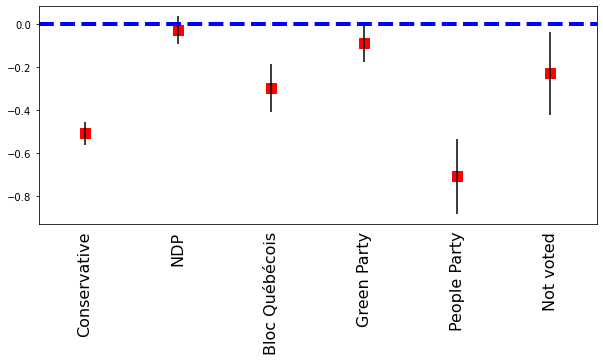

<Figure size 1440x216 with 0 Axes>

In [53]:
err_serries=fitted_model3.params-fitted_model3.conf_int()[0]
coef_df = pd.DataFrame({'coef': fitted_model3.params.values[1:],
                        'err': err_serries.values[1:],
                        'varname': err_serries.index.values[1:]
                       })

coef_df1=coef_df.loc[coef_df['varname'].str.contains('votechoice2019')]
fig, ax = plt.subplots(figsize=(8, 5))
plt.figure(figsize=(20, 3))
coef_df1.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False, figsize=(10, 4))
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df1.shape[0]), 
           marker='s', s=120, 
           y=coef_df1['coef'], color='r')
ax.axhline(y=0, linestyle='--', color='b', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Conservative', 'NDP', 'Bloc Québécois', 'Green Party','People Party','Not voted'], 
                       rotation=90, fontsize=16)


In [54]:
model5 = ols('attitude ~C(cps19_religion) + C(cps19_employment)+ C(cps19_province)+C(cps19_employment)+C(cps19_gender)+C(cps19_education)+C(cps19_bornin_canada)+age+ C(pes19_votechoice2019) +cpes19_nativism5+cpes19_nativism1+cpes19_immigjobs+ccps19_own_fin_retro', data=df)

In [55]:
fitted_model5 = model5.fit()
print(fitted_model5.summary())


                            OLS Regression Results                            
Dep. Variable:               attitude   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     42.24
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:55:39   Log-Likelihood:                -2808.1
No. Observations:                3574   AIC:                             5750.
Df Residuals:                    3507   BIC:                             6164.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [56]:
reg_result5 = pd.concat((fitted_model5.params, fitted_model5.tvalues), axis=1)
reg_result5=reg_result5.round(2)
reg_result5.to_csv('Refression_result3.csv')

<b>Explanation</b>

The above graph can well explain the importance of party support on attitude toward immigration. All the parties are below the blue line. Therefore, they are more against immigration compared to the omitted category which is the Liberal Party. People who voted for the People party and the Conservative party are more than any other people against immigration.  

<b>Question 4</b>
Why are the sources of attitudes among supporters of different parties 

To answer this interesting question I am going to use the interactions of vote choice with three variables of cpes19_immigjobs cpes19_nativism1 cpes19_nativism4

In [7]:
model4 = ols('attitude ~C(cps19_religion) + C(cps19_employment)+ C(cps19_province)+C(cps19_employment)+C(cps19_gender)+C(cps19_education)+C(cps19_bornin_canada)+age+ C(pes19_votechoice2019)+C(pes19_votechoice2019)*cpes19_nativism5+C(pes19_votechoice2019)*cpes19_nativism1+C(pes19_votechoice2019)*cpes19_immigjobs', data=df)

In [8]:
fitted_model4 = model4.fit()
fitted_model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attitude   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     33.88
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:51:11   Log-Likelihood:                -2797.5
No. Observations:                3574   AIC:                             5763.
Df Residuals:                    3490   BIC:                             6282.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     2.1692      0.546      3.972      0.000       1.098       3.240
C(cps19_religion)[T.Agnostic]                                              3.747e-06      0.039   9.69e-05      1.000      -0.076       0.076
C(cps19_religion)[T.Buddhist]                                                 0.1536      0.106      1.445      0.149      -0.055       0.362
C(cps19_religion)[T.Hindu]                                                   -0.2239      0.143     -1.568      0.117      -0.504       0.056
C(cps19_religion)[T.Jewish]                                                   0.0409      0.068      0.602      0.547      -0.092       0.174
C(cps19_religion)[T.Muslim]                                                   0.0656      0.089      0.741      0.459      -0.108       0.239
C(cps19_religion)[T.Sikh]                                                    -0.0715      0.145     -0.492      0.623      -0.356       0.213
C(cps19_religion)[T.Anglican]                                                -0.1130      0.041     -2.739      0.006      -0.194      -0.032
C(cps19_religion)[T.Baptist]                                                 -0.0277      0.059     -0.468      0.640      -0.144       0.088
C(cps19_religion)[T.Catholic]                                                -0.0068      0.025     -0.270      0.787      -0.056       0.043
C(cps19_religion)[T.Orthodox]                                                -0.1008      0.075     -1.351      0.177      -0.247       0.045
C(cps19_religion)[T.Jehovahs Witness]                                         0.5458      0.244      2.237      0.025       0.068       1.024
C(cps19_religion)[T.Lutheran]                                                -0.0156      0.068     -0.232      0.817      -0.148       0.117
C(cps19_religion)[T.Church of Jesus Christ of the Latter Day Saints]         -0.0007      0.158     -0.004      0.997      -0.310       0.309
C(cps19_religion)[T.Pentecostal/ Fundamentalist/ Born Again/ Evangelical]     0.1154      0.060      1.926      0.054      -0.002       0.233
C(cps19_religion)[T.Presbyterian]                                            -0.0531      0.067     -0.795      0.427      -0.184       0.078
C(cps19_religion)[T.Protestant]                                              -0.1140      0.045     -2.534      0.011      -0.202      -0.026
C(cps19_religion)[T.United Church of Canada]                                 -0.0728      0.041     -1.781      0.075      -0.153       0.007
C(cps19_religion)[T.Christian Reformed]                                       0.1263      0.092      

<b>Explanation</b>
The result of the above regression is very interesting. The Conservative and People  Parties' interaction with cpes19_immigjobs is significant meaning that people supporting those two parties are against immigration because they think immigrants take jobs away from them. the surprising result is for those people who did not vote in the 2019 election. The interaction between this group and the cpes19_nativism1 variable is significant suggesting that if people who do not support a party  become against immigration this is because they think the will of the majority (Canadians) should prevail in Canada. This is interesting because Canada introduced The Multiculturalism Act affirming that   the Government of Canada must ensure that every Canadian receives equal treatment by the government. Can this suggest that they did not vote because they are against this Act? I do not think it would be this simple but it is an interesting question to explore more. 

References: 
    Card, David, Christian Dustmann, and Ian Preston. 2005. “Understanding Attitudes to Immigration : The Migration and Minority Module of the First European Social Survey.” CReAM Discussion Paper Series 03 (05): 1–43.
    Sidanius, Jim, and Felicia Pratto. 1999. Social Dominance. Social Dominance. Cambridge University Press. https://doi.org/10.1017/cbo9781139175043.
    

In [12]:
df.to_csv('C:/Users/mehdi/data301/course-project-solo_506-1/data/processed/Tableau.csv', index = False)
